# Estudio del mercado de videojuegos

En este proyecto se busca identificar patrones que determinen si un juego tiene éxito o no, con el objetivo de detectar proyectos prometedores y planificar campañas publicitarias.

**Tabla de contenidos**<a id='toc0_'></a>    
- [Información general](#toc1_)    
- [Preparación de los datos](#toc2_)    
  - [Columna `year_of_release`](#toc2_1_)    
  - [Columna `name ` y `genre`](#toc2_2_)    
  - [Columna `critic_score`](#toc2_3_)    
  - [Columna user_score](#toc2_4_)    
  - [Columna `rating`](#toc2_5_)    
- [Análisis de los datos](#toc3_)    
  - [Conteo de juegos lazandos por año](#toc3_1_)    
  - [Plataformas con más ventas](#toc3_2_)    
  - [Estudio de plataformas con potencial de crecer](#toc3_3_)    
  - [Distribución del total de ventas](#toc3_4_)    
  - [Estudio de la relación entre las ventas totales y las calificaciones de los críticos y de los usuarios](#toc3_5_)    
  - [Análisis de las ventas de videojuegos por género](#toc3_6_)    
  - [Perfil de usuarios por región](#toc3_7_)    
    - [Cuota de mercado de plataformas por región](#toc3_7_1_)    
    - [Cuota de mercado del género por región](#toc3_7_2_)    
    - [Ventas por rating](#toc3_7_3_)    
  - [Testeo de hipótesis](#toc3_8_)    
    - [Hipótesis 1](#toc3_8_1_)    
    - [Hipótesis 2](#toc3_8_2_)    
- [Conclusiones](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Información general](#toc0_)

In [147]:
# LIbrerías 

from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
# Datos a trabajar 

games = pd.read_csv('/datasets/games.csv')

print(games.info())
games


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Observaciones que requieren atención:**

- Los nombres de las columnas contienen caractéres en mayúscula.

- Year_of_release debería ser tipo int, pero está registrado como objeto.

- User_Score debería ser float64, pero está registrado como objeto.

- El dataframe tiene un número grande de valores nulos en las columnas Year_of_Release, Critic_Score, User_Score y Rating.


## <a id='toc2_'></a>[Preparación de los datos](#toc0_)

Se inicia transformando los títulos de las columnas a minúsculas y luego se trata cada una de las columnas que requieren atención.

In [149]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Se confirma que no existen filas duplicadas.

In [150]:
games.duplicated().sum()

0

Se agrega la columna `total_sales`:

In [151]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### <a id='toc2_1_'></a>[Columna `year_of_release`](#toc0_)

In [152]:

games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Esta columna tiene 296 valores ausentes. Se elige reemplazar los valores nulos por el año más reciente de lanzamiento de juegos del mismo título.

In [153]:
def fill_year(df):
    max_by_name = df.groupby('name')['year_of_release'].max().reset_index()
    df = pd.merge(df, max_by_name, on='name', how='left', suffixes=('', '_max'))
    df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release_max'])
    df = df.drop('year_of_release_max', axis=1)
    return df

In [154]:
games = fill_year(games)
games.isna().sum()

name                  2
platform              0
year_of_release     146
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

Todavía existen valores ausentes pero en menor cantidad. Al ser su proporción casí insignificante con respecto al resto de los datos, se elige eliminarlos. Realizado esto, se transforma la columna a tipo int.

In [155]:
print(f"Proporción de valores nulos: {games['year_of_release'].isna().sum()/len(games['year_of_release']):.2%}")

Proporción de valores nulos: 0.87%


In [156]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype(int)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
 11  total_sales      16569 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Ya no existen valores ausentes en la columna. 

### <a id='toc2_2_'></a>[Columna `name ` y `genre`](#toc0_)

Existen dos filas con valores ausentes tanto en `name` como en `genre`. Se elige borrarlas del conjunto de datos.

In [157]:
games[(games['name'].isna()) | (games['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [158]:
# se eliminan ya que son un conjunto muy pequeño
games = games.dropna(subset=['name','genre']).reset_index(drop=True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
total_sales           0
dtype: int64

### <a id='toc2_3_'></a>[Columna `critic_score`](#toc0_)

Como se observó previamente, existen 8576 valores nulos en esta columna, la cual es una proporción importante de los datos. 

In [159]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Podría pasar que las filas que tienen valores nulos en critic_score también lo tendrán en user_score. Se verifica si esto es correcto: 

In [160]:
mask = games[['critic_score', 'user_score']].isnull()


rows_with_both_null = mask.all(axis=1)


games[rows_with_both_null]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


La mayoría de filas (6661 de 8576 filas con valores nulos) son efectivamente así, por lo que el tratamiento de los valores ausentes podría tener el mismo enfoque en ambas columnas. Conociendo esto, se evaluará si critic_score podría tener valores similares según la plataforma y el género. Para ello, se estudia la distribución por género de dos plataformas seleccionadas al azar: PS2 y X360.

Text(0, 0.5, 'Critic Score')

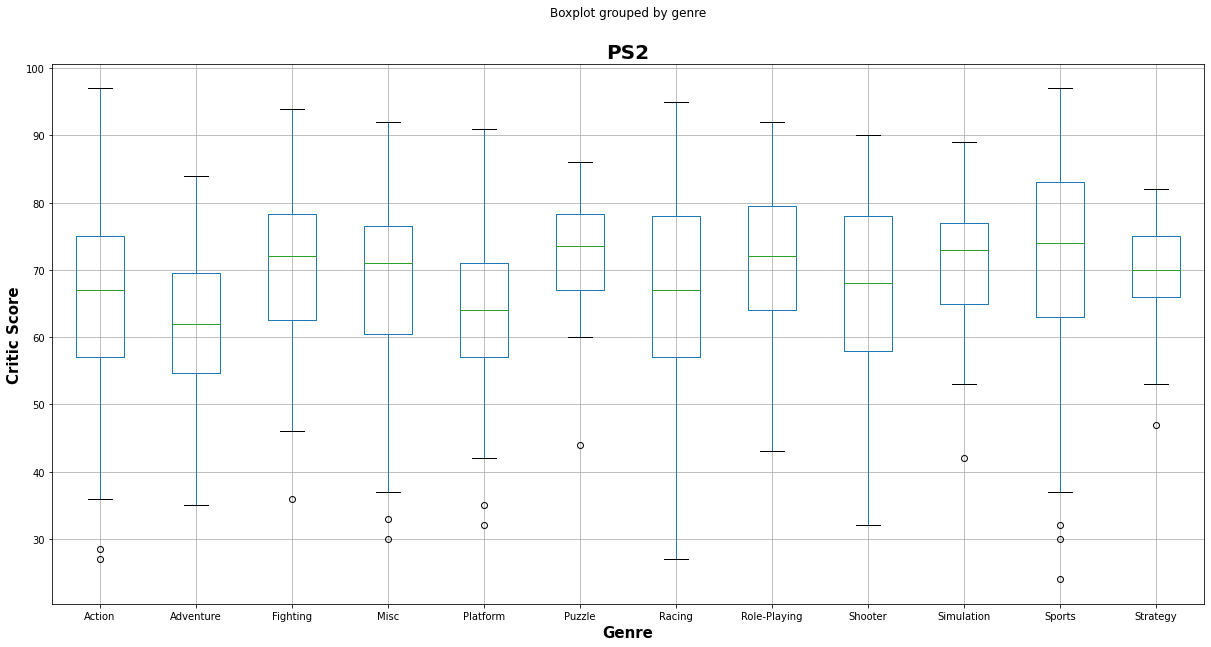

In [234]:
games.query('platform == "PS2"').boxplot(column='critic_score', by='genre', figsize=(20, 10))
plt.title('PS2', fontsize=20, fontweight='bold')
plt.xlabel('Genre', fontsize=15, fontweight='bold')
plt.ylabel('Critic Score', fontsize=15, fontweight='bold')

Text(0, 0.5, 'Critic Score')

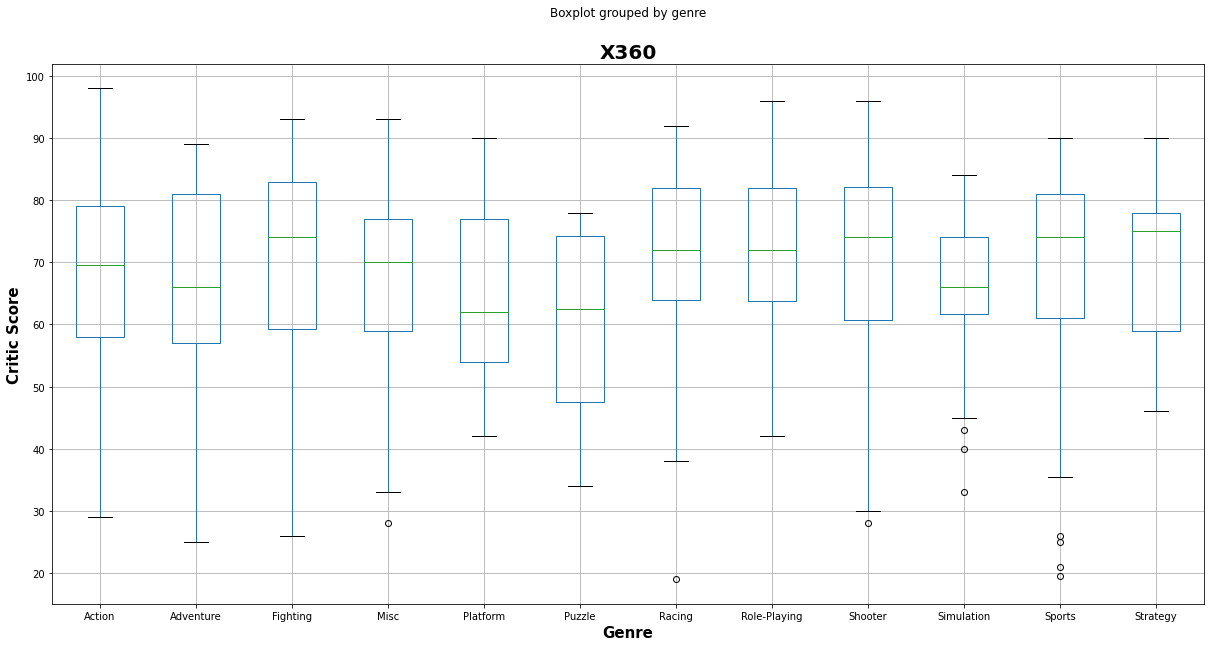

In [235]:

games.query('platform == "X360"').boxplot(column='critic_score', by='genre', figsize=(20, 10))
plt.title('X360', fontsize=20, fontweight='bold')
plt.xlabel('Genre', fontsize=15, fontweight='bold')
plt.ylabel('Critic Score', fontsize=15, fontweight='bold')

Se observa en general que las puntuaciones tienen una alta variabilidad. En la mayoría de los géneros, los rangos en que las puntuaciones varían abarcan más del 50% del rango normal para esta variable (0-100). Se concluye que no es posible encontrar una imputación aceptable para esta columna y, por lo tanto, se mantienen los valores nulos.

In [163]:
# Se aplica tu_numeric por si existen tipos no numericos a parte de los valores nulos
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')

### <a id='toc2_4_'></a>[Columna user_score](#toc0_)

In [165]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

En primer lugar, se observa que los valores de esta columna se leyeron como tipo string, por lo tanto, se los convierte a tipo numérico. 

In [166]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [167]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Esta operación, sin embargo, aumentó el número de valores nulos, ya que la columna contenía valores tipo string ("tbd") que también indicaban la ausencia de valor. 

In [236]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7532
user_score         9027
rating                0
total_sales           0
dtype: int64

Esta columna también comparte una importante cantidad de valores nulos en las mismas filas que en critic_score. Se revisan las mismas distribuciones que en critic_score.

(0.0, 10.0)

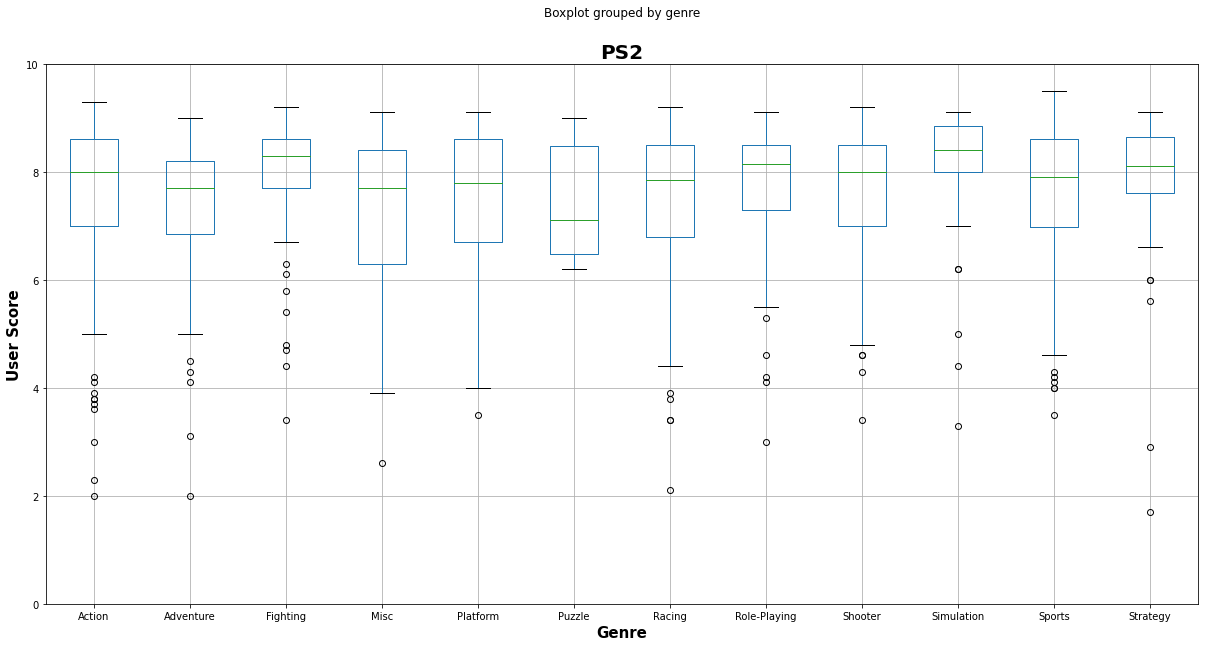

In [240]:
games.query('platform == "PS2"').boxplot(column='user_score', by='genre', figsize=(20, 10))
plt.title('PS2', fontsize=20, fontweight='bold')
plt.xlabel('Genre', fontsize=15, fontweight='bold')
plt.ylabel('User Score', fontsize=15, fontweight='bold')
plt.ylim(0,10)

(0.0, 10.0)

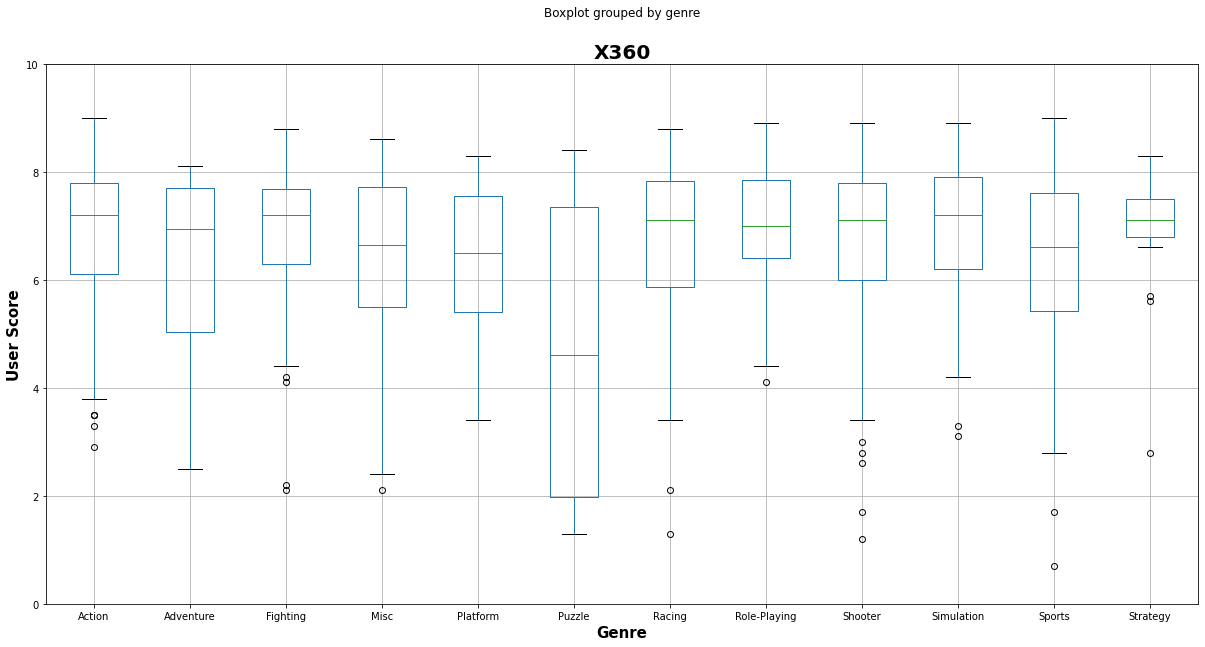

In [241]:
games.query('platform == "X360"').boxplot(column='user_score', by='genre', figsize=(20, 10))
plt.title('X360', fontsize=20, fontweight='bold')
plt.xlabel('Genre', fontsize=15, fontweight='bold')
plt.ylabel('User Score', fontsize=15, fontweight='bold')
plt.ylim(0,10)

Nuevamente, se observa en general una alta variabilidad, aunque menor a la anterior, de las puntuaciones para los distintos géneros. Por lo tanto, no es posible encontrar una imputación aceptable para esta columna. Se mantienen los valores nulos.

### <a id='toc2_5_'></a>[Columna `rating`](#toc0_)

Al ser una columna categórica, se rellenan los valores nulos con el valor de la moda por género.

In [169]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [170]:
def fill_rating(df):
    modes_by_genre = df.groupby('genre')['rating'].agg(pd.Series.mode).reset_index()
    df = pd.merge(df, modes_by_genre, on='genre', how='left', suffixes=('', '_mode'))
    df['rating'] = df['rating'].fillna(df['rating_mode'])
    df = df.drop('rating_mode', axis=1)
    return df

In [171]:
games = fill_rating(games)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7532
user_score         9027
rating                0
total_sales           0
dtype: int64

Los valores ausentes se eliminaron en su totalidad. Se finaliza transformando la columna a tipo category. 

In [172]:
games['rating'] = games['rating'].astype('category')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16567 non-null  object  
 1   platform         16567 non-null  object  
 2   year_of_release  16567 non-null  int64   
 3   genre            16567 non-null  object  
 4   na_sales         16567 non-null  float64 
 5   eu_sales         16567 non-null  float64 
 6   jp_sales         16567 non-null  float64 
 7   other_sales      16567 non-null  float64 
 8   critic_score     9035 non-null   float64 
 9   user_score       7540 non-null   float64 
 10  rating           16567 non-null  category
 11  total_sales      16567 non-null  float64 
dtypes: category(1), float64(7), int64(1), object(3)
memory usage: 1.5+ MB


## <a id='toc3_'></a>[Análisis de los datos](#toc0_)

### <a id='toc3_1_'></a>[Conteo de juegos lazandos por año](#toc0_)

Se echa un vistazo al número de juegos lanzados por año.

<AxesSubplot:xlabel='year_of_release'>

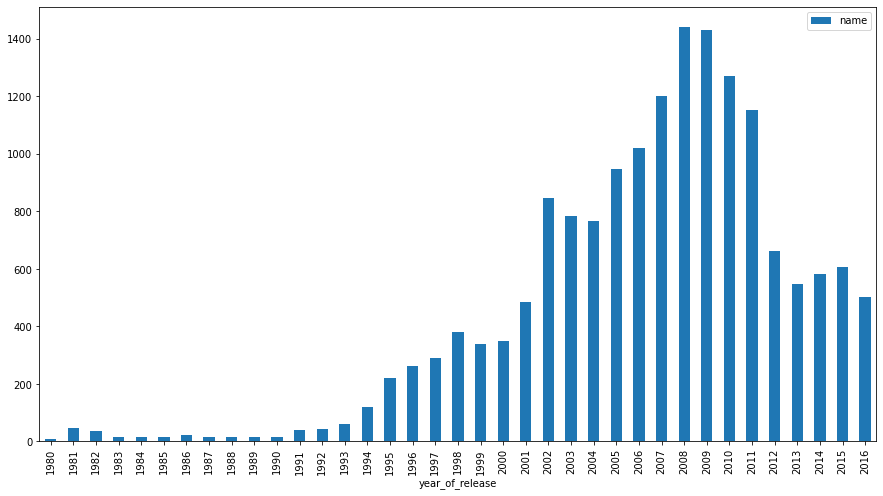

In [173]:
games_per_year = games.groupby('year_of_release')['name'].count().reset_index().sort_values(by='year_of_release')
# hacer gráfico de barras
games_per_year.plot(x='year_of_release',y='name', kind='bar', figsize=(15,8))


La mayoría de los juegos fueron lanzados entre 2002 y 2012. En general se observa una tendencia creciente en el lanzamiento de juegos desde 1980 hasta alcanzar su pico en el 2008. A partir de entonces, el número de lanzamientos empezó a descender. 

### <a id='toc3_2_'></a>[Plataformas con más ventas](#toc0_)

A continuación, se muestran las plataformas con mayores ventas acumuladas: 

In [174]:
top_sales_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head()
top_sales_platform

,platform,total_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28


La cantidad de ventas es liderada por la PS2, seguido de la X360 y la PS3. Se gráfica a continuación la evolución de las ventas por año de cada plataforma.

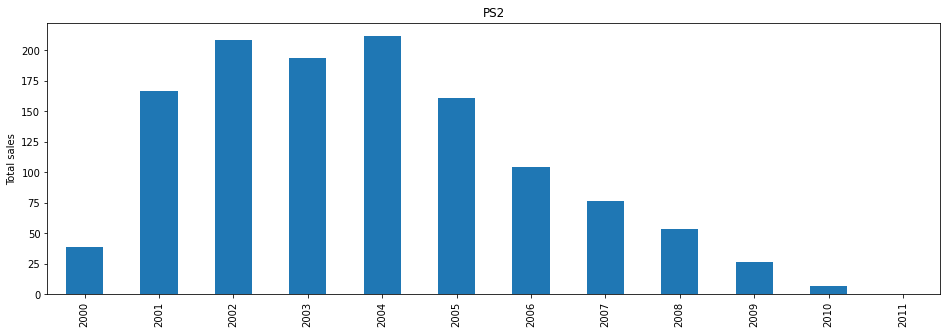

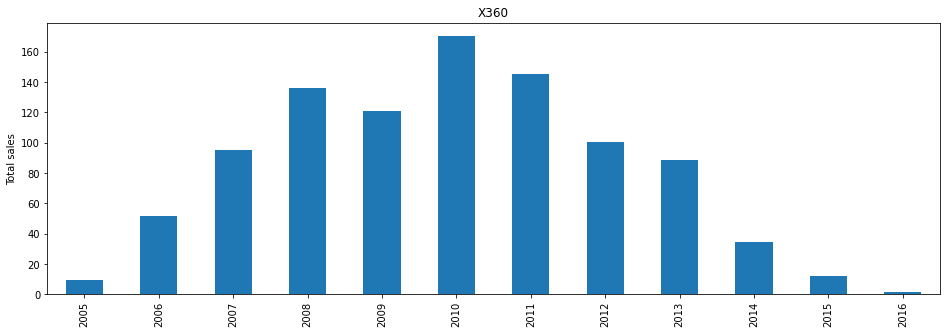

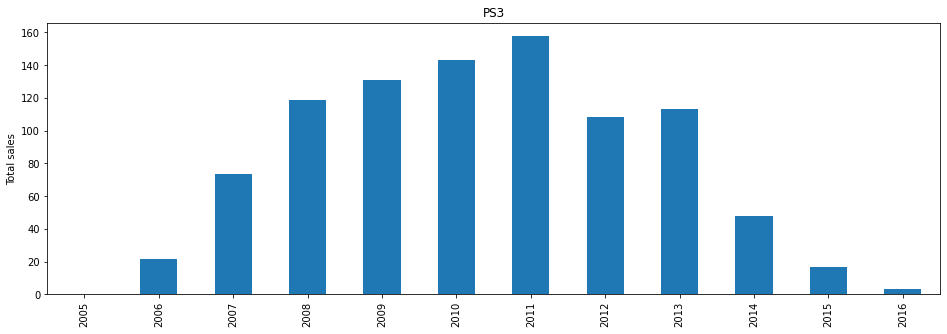

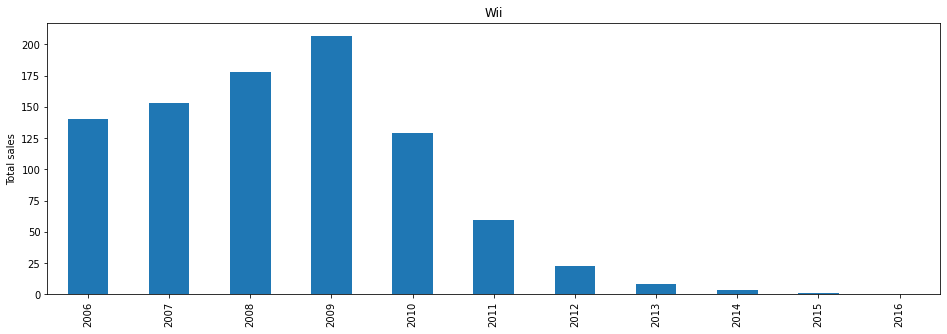

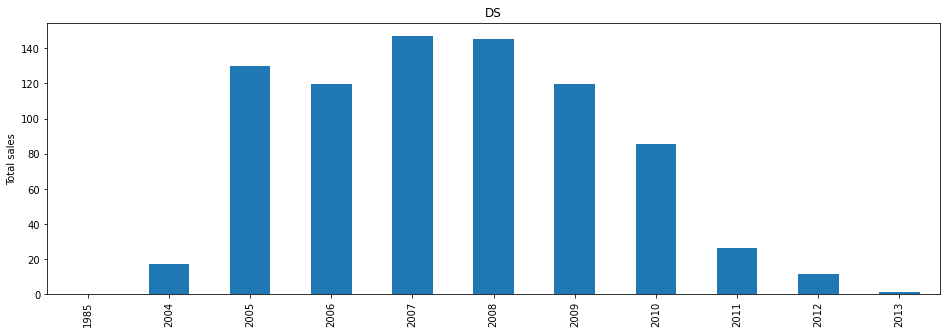

In [175]:
for platform in top_sales_platform['platform']:
    p_slice=games[games['platform'] == platform]
    p_slice.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(16, 5))
    plt.title(platform)
    plt.xlabel('')
    plt.ylabel('Total sales')
    plt.show()

La PS2 tuvo su mayor popularidad entre los años 2001 y 2005, visto a través del tamaño de sus ventas. Los mejores años para la X360 fueron del 2008 al 2011. La PS3 vio incrementándose sostenidadmente su popularidad hasta el año 2011. La Wii por su lado gozó de una popularidad creciente hasta el 2009, a partir de entonces sus ventas decrecieron. Finalmente, las ventas de la DS fueron altas y estables entre 2005 y 2009 pero por debajo de las ventas del resto de consolas. En general, se puede observar que las distintas plataformas mantienen altos niveles de popularidad, reflejado por ventas que superan los 100 millones de dólares, durante 5 y 6 años. También se observa que estos los períodos de alta popularidad se solapan con el período con mayor lanzamiento de juegos (2007-2011) que se identificó en el gráfico del conteo por año.

### <a id='toc3_3_'></a>[Estudio de plataformas con potencial de crecer](#toc0_)

Con base en las observaciones anteriores, se selecciona un período de estudio de 4 años que comprende los años 2012-2015 para poder englobar e identificar plataformas que estén atravesando por un período de crecimiento en sus ventas. Se excluye la información del 2016 puesto que es el último año de recopilación y la información podría estar incompleta.

In [176]:
study_data = games.query('2016 > year_of_release > 2011')
top_study_platforms = study_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(6)
top_study_platforms

,platform,total_sales
0,PS3,286.11
1,PS4,244.89
2,X360,236.00
3,3DS,179.87
4,XOne,133.17
5,WiiU,77.59


La PS4, 3DS, XOne y WiiU son plataformas que se lanzaron en los últimos años y que podrían tener potencial de crecimiento. 

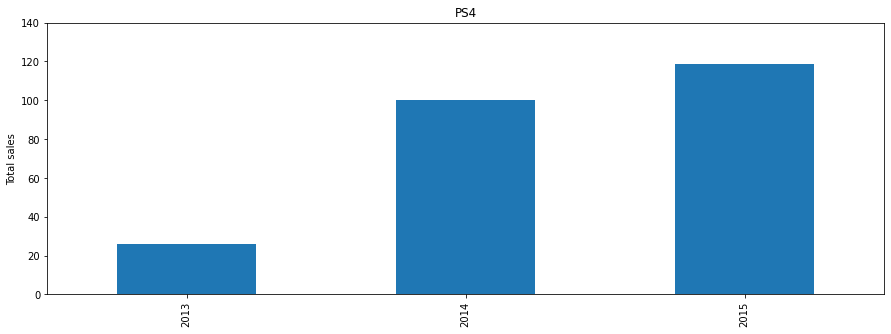

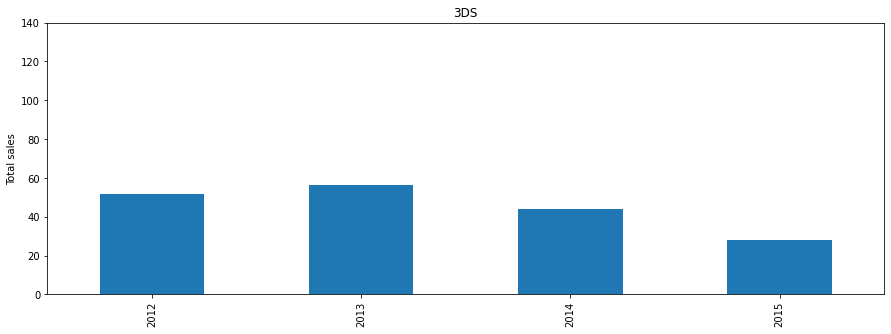

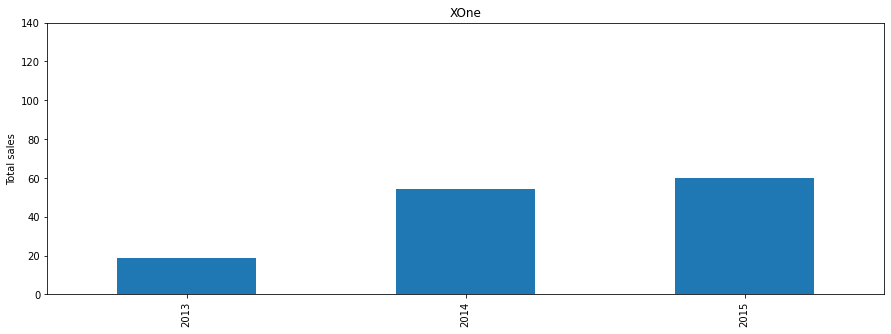

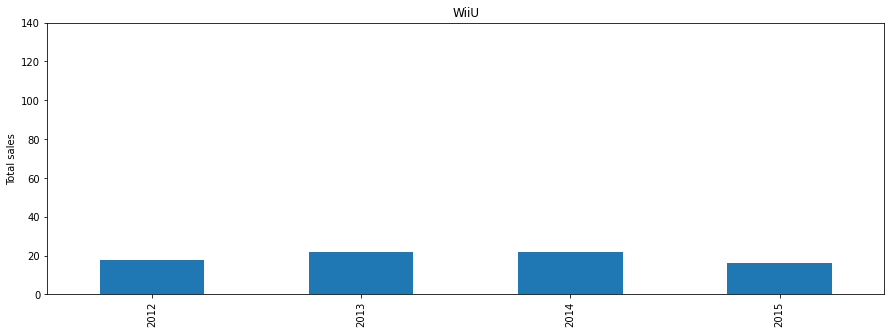

In [177]:
promising_platforms = ['PS4', '3DS', 'XOne', 'WiiU']

for platform in promising_platforms:
    p_slice=study_data[study_data['platform'] == platform]
    p_slice.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(15, 5))
    plt.title(platform)
    plt.ylim(0,140)
    plt.xlabel('')
    plt.ylabel('Total sales')
    plt.show()

A partir de los gráficos se puede observar los siguiente: 
- Las consolas PS4 y XOne, al tener poco tiempo de haber sido lanzadas, están experimentando un crecimiento en sus ventas de videojuegos y no aparentan llegar a su pico de popularidad aún. En particular, la PS4 superó los 100 millones en ventas desde 2014 y se podría esperar que este nivel se mantenga por unos años. La XOne por su lado podría superar este valor en los próximos años.
- En cambio, la consola 3DS no ha mantenido una tendencia creciente y su popularidad ha ido disminuyendo sin haber logrado números importantes en ventas. Algo similar parece ocurrir con la WiiU, donde el nivel de ventas ha sido aún más bajo.

### <a id='toc3_4_'></a>[Distribución del total de ventas](#toc0_)

A continuación, se muestra un diagrama de caja con las ventas de todos los videojuegos para las plataformas analizadas previamente. Se escoge como muestra únicamente la información del 2015.

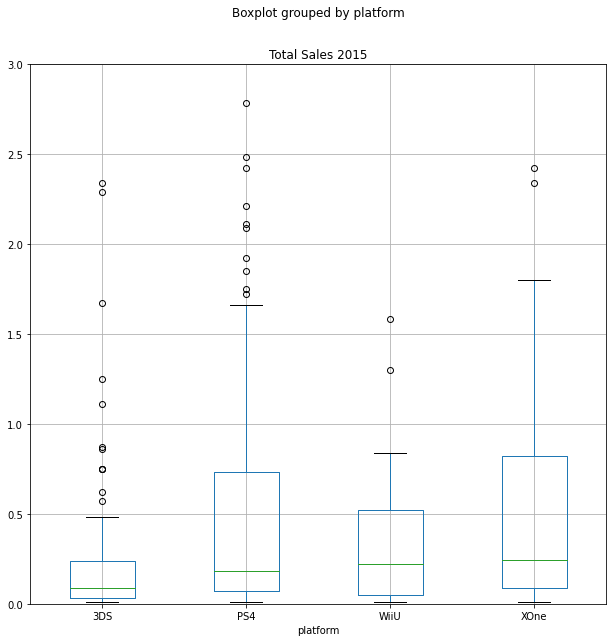

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,86.0,0.323023,0.624291,0.01,0.0300,0.090,0.2400,3.32
PS4,137.0,0.867883,1.857170,0.01,0.0700,0.180,0.7300,14.63
WiiU,28.0,0.583929,1.008392,0.01,0.0500,0.220,0.5225,4.44
XOne,80.0,0.751750,1.234873,0.01,0.0875,0.245,0.8200,7.39


In [178]:
promising_2015_data = study_data[(study_data['platform'].isin(promising_platforms))&(study_data['year_of_release']==2015)]
promising_2015_data.boxplot(column='total_sales', by='platform', figsize=(10, 10))
plt.title('Total Sales 2015')
plt.ylim(0,3)
plt.show()
promising_2015_data.groupby('platform')['total_sales'].describe()

- La consola PS4 tiene la media más alta de las cuatro, lo que indica que en promedio los juegos de PS4 venden más que los de las otras tres plataformas.
- Las distribuciones de PS4 y XOne son similares entre sí, sugieriendo que podría no haber diferencias significativas entre las ventas de ambas plataformas. 
- Las ventas de 3DS son en general más bajas que las otras plataformas y su diferencia podría ser significativa.
- Existe una importante cantidad de valores extremos en las cuatro plataformas.

### <a id='toc3_5_'></a>[Estudio de la relación entre las ventas totales y las calificaciones de los críticos y de los usuarios](#toc0_)

Se estudia a continuación la relación entre las calificaciones de los críticos y de los usuarios con las ventas totales de los videojuegos. 
Se realiza el análisis con las mismas plataformas analizadas previamente. 

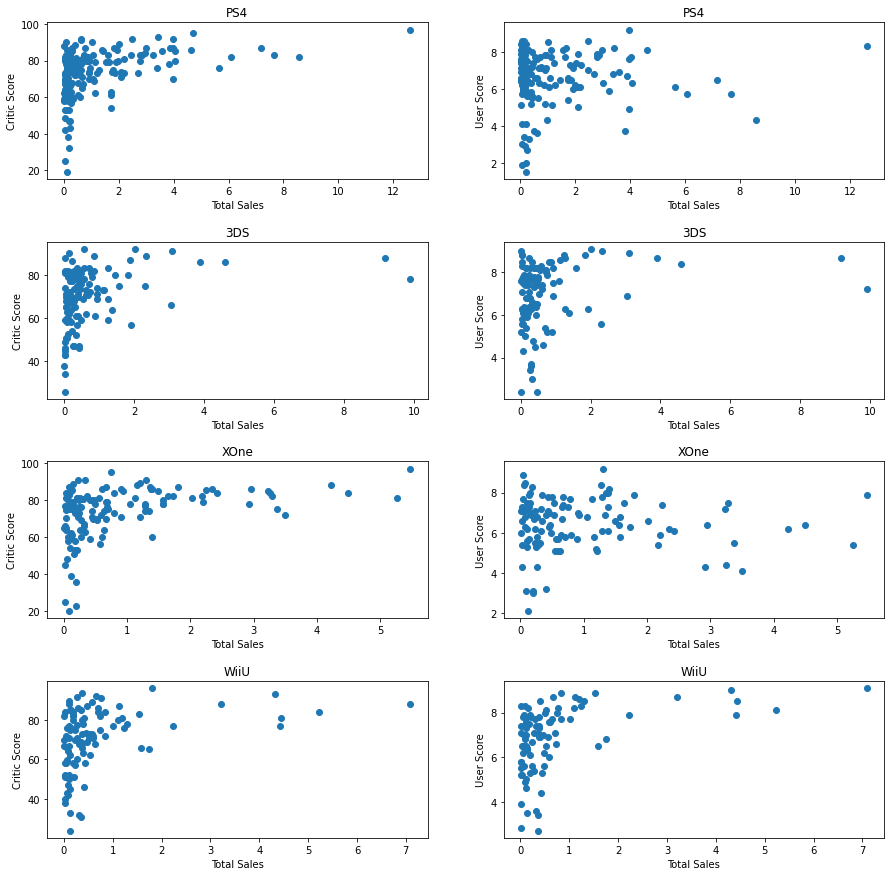

In [179]:
fig, axes = plt.subplots(nrows=len(promising_platforms), ncols=2, figsize=(15, 15))
for i, column in enumerate(promising_platforms):
    platform_slice = study_data.query('platform == @column')
    axes[i, 0].scatter(x=platform_slice['total_sales'], y=platform_slice['critic_score'])
    axes[i, 0].set_xlabel('Total Sales')
    axes[i, 0].set_ylabel("Critic Score")
    
    axes[i, 1].scatter(x=platform_slice['total_sales'], y=platform_slice['user_score'])
    axes[i, 1].set_xlabel('Total Sales')
    axes[i, 1].set_ylabel("User Score")
    
    axes[i, 0].set_title(column)
    axes[i, 1].set_title(column)
    
plt.subplots_adjust(hspace=0.4)

plt.show()

No se observa una relación clara entre las ventas totales y las calificaciones. 

In [180]:
# Se calculan los coeficiente de correlación

print('Coeficientes de Pearson para Total Sales vs Critic Score')
for i, column in enumerate(promising_platforms):
    platform_slice = study_data.query('platform == @column')
    corr = platform_slice['total_sales'].corr(platform_slice['critic_score'])
    print(f'{column}: {corr}')
    
print()
print('Coeficientes de Pearson para Total Sales vs User Score')
for i, column in enumerate(promising_platforms):
    platform_slice = study_data.query('platform == @column')
    corr = platform_slice['total_sales'].corr(platform_slice['user_score'])
    print(f'{column}: {corr}')

Coeficientes de Pearson para Total Sales vs Critic Score
PS4: 0.40539769087379296
3DS: 0.3012553535097007
XOne: 0.3853395107083804
WiiU: 0.33470136829786273

Coeficientes de Pearson para Total Sales vs User Score
PS4: 0.024230832360622553
3DS: 0.21121653622103195
XOne: -0.03926828544552199
WiiU: 0.41326541780286724


Los coeficientes para Total Sales vs Critic Score muestran que las cuatro plataformas tienen una correlación positiva, aunque débil, de las ventas con la calificación de los críticos, siendo más fuerte la de PS4. Por otro lado, los coeficientes para Total Sales vs User Score son más bajos en general, excepto por la WiiU que tiene la correlación más alta de todas. 

Estos resultados sugieren que para todas las plataformas las calificaciones de los críticos están más relacionados con las ventas totales pero aún así la correlación es baja. En el caso de las calificaciones de los usuarios, las correlaciones son más bajas excepto por la WiiU donde la correlación es la más fuerte de todas.

### <a id='toc3_6_'></a>[Análisis de las ventas de videojuegos por género](#toc0_)

Se explora el total de ventas por género durante el período de estudio.

Text(0, 0.5, 'Total sales')

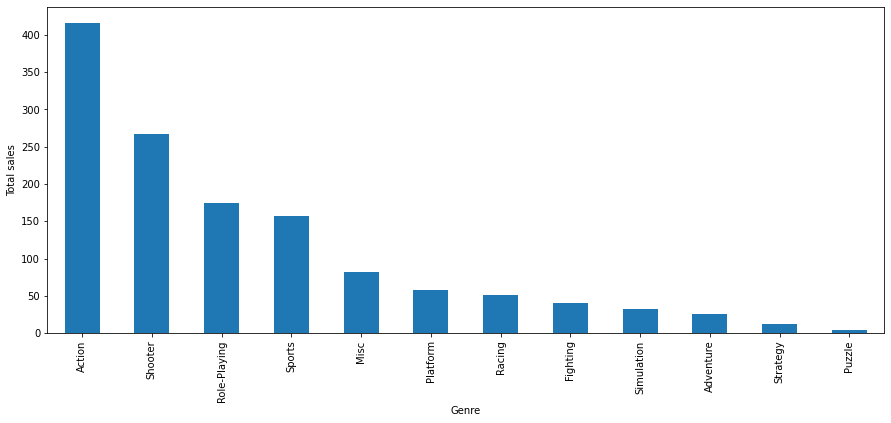

In [181]:
study_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.xlabel('Genre')
plt.ylabel('Total sales')

Durante el período 2010-2015 los juegos de Action, Shooter y Role-playing ocuparon los tres primeros puestos en ventas. Mientras que los juegos de Adventure, Strategy y Puzzle fueron los menos rentables.

### <a id='toc3_7_'></a>[Perfil de usuarios por región](#toc0_)

#### <a id='toc3_7_1_'></a>[Cuota de mercado de plataformas por región](#toc0_)

platform
X360    139.88
PS3     103.07
PS4      87.25
XOne     78.85
3DS      51.35
Name: na_sales, dtype: float64


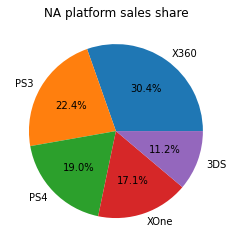

In [200]:
na_top_platforms = study_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
print(na_top_platforms)
ax = na_top_platforms.plot(kind='pie', autopct='%1.1f%%', title='NA platform sales share')
ax.set_ylabel('')
plt.show()


platform
PS4     109.31
PS3     106.01
X360     74.18
XOne     41.96
3DS      40.50
Name: eu_sales, dtype: float64


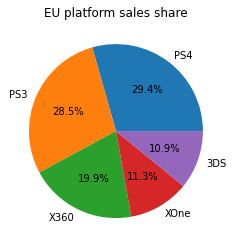

In [184]:
eu_top_platforms = study_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
print(eu_top_platforms)
ax = eu_top_platforms.plot(kind='pie', autopct='%1.1f%%', title='EU platform sales share')
ax.set_ylabel('')
plt.show()


platform
3DS     79.76
PS3     33.99
PSV     17.48
WiiU    12.34
PSP     10.71
Name: jp_sales, dtype: float64


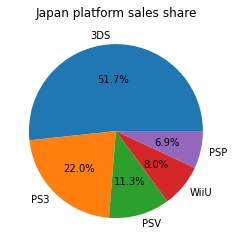

In [185]:
jp_top_platforms = study_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
print(jp_top_platforms)
ax = jp_top_platforms.plot( kind='pie', autopct='%1.1f%%', title='Japan platform sales share')
ax.set_ylabel('')
plt.show()


Los resultados muestran que para Norteamérica la mayor cuota de mercado la tiene la consola X360 para el período de estudio seleccionado. En la Unión Europa la consola líder es la PS4, mientras que en Japón es la 3DS. La consola PS3 es la única que se ubica en el top 3 en ventas de los tres países. Finalmente, se observa en general una mayor cantidad de ventas en Norteamérica, seguido de Europa y, por último, Japón.

#### <a id='toc3_7_2_'></a>[Cuota de mercado del género por región](#toc0_)

genre
Action          170.86
Shooter         128.55
Sports           73.99
Role-Playing     58.11
Misc             37.43
Name: na_sales, dtype: float64


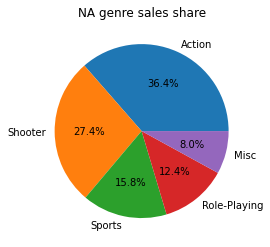

In [186]:
na_top_genre = study_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
print(na_top_genre)
ax = na_top_genre.plot( kind='pie', autopct='%1.1f%%', title='NA genre sales share')
ax.set_ylabel('')
plt.show()

genre
Action          151.02
Shooter          97.57
Sports           57.08
Role-Playing     44.25
Misc             25.66
Name: eu_sales, dtype: float64


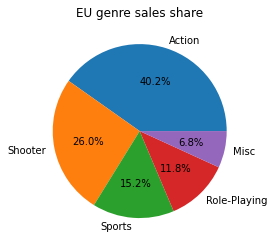

In [187]:
eu_top_genre = study_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
print(eu_top_genre)
ax = eu_top_genre.plot( kind='pie', autopct='%1.1f%%', title='EU genre sales share')
ax.set_ylabel('')
plt.show()

genre
Role-Playing    58.83
Action          45.73
Misc            12.06
Simulation      10.08
Fighting         8.69
Name: jp_sales, dtype: float64


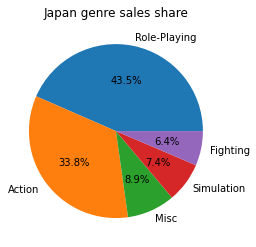

In [188]:
jp_top_genre = study_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
print(jp_top_genre)
ax = jp_top_genre.plot( kind='pie', autopct='%1.1f%%', title='Japan genre sales share')
ax.set_ylabel('')
plt.show()

Los resultados muestran que para Norteamérica y Europa los videojuegos con mayor cuota de mercado son los de action, shooter y sports, mientras que para Japón los juegos de role playing, action y misc son los más vendidos.

#### <a id='toc3_7_3_'></a>[Ventas por rating](#toc0_)

rating
M       234.75
E       132.16
T       107.34
E10+     74.12
AO        0.00
Name: na_sales, dtype: float64


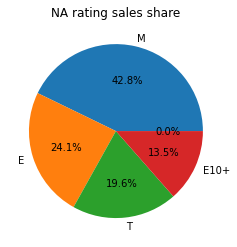

In [189]:
na_top_rating = study_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()
print(na_top_rating)
ax = na_top_rating.plot( kind='pie', autopct='%1.1f%%', title='NA rating sales share')
ax.set_ylabel('')
plt.show()

rating
M       194.06
E       128.92
T        81.54
E10+     53.44
AO        0.00
Name: eu_sales, dtype: float64


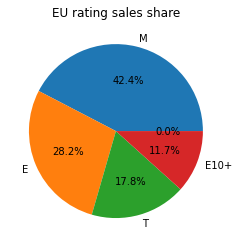

In [190]:
eu_top_rating = study_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()
print(eu_top_rating)
ax = eu_top_rating.plot( kind='pie', autopct='%1.1f%%', title='EU rating sales share')
ax.set_ylabel('')
plt.show()

rating
T       95.00
E       49.70
M       21.07
E10+     7.74
AO       0.00
Name: jp_sales, dtype: float64


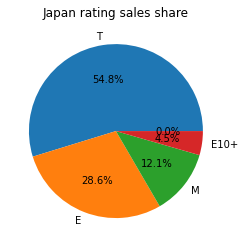

In [191]:
jp_top_rating = study_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()
print(jp_top_rating)
ax = jp_top_rating.plot( kind='pie', autopct='%1.1f%%', title='Japan rating sales share')
ax.set_ylabel('')
plt.show()

Los tres principales ratings de videojuegos son los mismos para Norteamérica como para Europa: M, E y T. Para Japón el orden cambia, siendo T la primera, seguido de E y M. 

### <a id='toc3_8_'></a>[Testeo de hipótesis](#toc0_)

#### <a id='toc3_8_1_'></a>[Hipótesis 1](#toc0_)

Se desea conocer si son diferentes estadísticamente las calificaciones promedio de los usuarios para las plataformas Xbox One y PC. Se evalúan las siguientes hipótesis:
- **Hipótesis nula:** Las calificaciones promedio de los usuarios son las mismas entre XOne y PC. 

- **Hipótesis alternativa:** ELas calificaciones promedio de los usuarios difieren entre XOne y PC.

Se aplica un nivel de significancia de alpha=0.05 para comparar con el valor p obtenido.

In [212]:
# Se crean slices para cada plataforma dejando fuera posibles valores nulos
xone_data = study_data.query('platform == "XOne"').dropna()
pc_data = study_data.query('platform == "PC"').dropna()

In [214]:
# Se muestra la varianza de calificaciones ambos grupos
print(f"Varianza de calificaciones de XOne: {np.var(xone_data['user_score'])}")
print(f"Varianza de calificaciones de PC: {np.var(pc_data['user_score'])}")

# Se muestra la media de calificaciones de ambos grupos
print()
print(f"Media de calificaciones de XOne: {xone_data['user_score'].mean()}")
print(f"Media del calificaciones de PC: {pc_data['user_score'].mean()}")

Varianza de calificaciones de XOne: 1.6560952741020794
Varianza de calificaciones de PC: 2.6585733575093546

Media de calificaciones de XOne: 6.472173913043478
Media del calificaciones de PC: 6.480745341614908


Primero se aplica el test de Levene para evaluar la igualdad de varianzas entre los grupos de datos. Se evalúa la hipótesis nula de que las varianzas son iguales en ambos grupos y la hipótesis alternativa de que las varianzas difieren.

In [215]:
# Prueba de igualdad de varianzas
from scipy.stats import levene

alpha  = 0.05

result = levene(xone_data['user_score'], pc_data['user_score'])


print('Valor p:', result.pvalue)

if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


Valor p: 0.012775466686615467
Rechazamos la hipótesis nula


El valor p menor al nivel de significancia (0.05) indica que existe evidencia de que las varianzas de ambos grupos no son iguales. Por lo tanto, se establece `equal_var=False` en la prueba `scipy.stats.ttest_ind(array1, array2, equal_var)`.

In [222]:
# Prueba de hipótesis
alpha  = 0.05

results = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


p-value: 0.9612974433155292
No rechazamos la hipótesis nula


El resultado indica que no existe evidencia estadística para rechazar la hipótesis nula dado el valor p mucho mayor a alpha. Se puede decir entonces que las calificaciones promedio de los usuarios son iguales entre XOne y PC.

#### <a id='toc3_8_2_'></a>[Hipótesis 2](#toc0_)

Se desea conocer si son diferentes estadísticamente las calificaciones promedio de los usuarios para los géneros de Acción y Deportes. Se evalúan las siguientes hipótesis:

- **Hipótesis nula:** Las calificaciones promedio de los usuarios son las mismas para los géneros de Acción y Deportes.

- **Hipótesis alternativa:** ELas calificaciones promedio de los usuarios difieren para los géneros de Acción y Deportes.

Se aplica un nivel de significancia de alpha=0.05 para comparar con el valor p obtenido.

In [217]:
# Se crean slices para cada género dejando fuera posibles valores nulos
action_data = study_data.query('genre == "Action"').dropna()
sports_data = study_data.query('genre == "Sports"').dropna()

In [223]:
# Se muestra la varianza de calificaciones ambos grupos
print(f"Varianza de calificaciones de Action: {np.var(action_data['user_score'])}")
print(f"Varianza de calificaciones de Sports: {np.var(sports_data['user_score'])}")

# Se muestra la media de calificaciones de ambos grupos
print()
print(f"Media de calificaciones de Action: {action_data['user_score'].mean()}")
print(f"Media del calificaciones de Sports: {sports_data['user_score'].mean()}")

Varianza de calificaciones de Action: 1.8015348502052584
Varianza de calificaciones de Sports: 2.7409414036817883

Media de calificaciones de Action: 6.876168224299065
Media del calificaciones de Sports: 5.487820512820512


A continuación se aplica nuevamente el test de Levene.

In [224]:
# Prueba de igualdad de varianzas
from scipy.stats import levene

alpha  = 0.05

result = levene(action_data['user_score'], sports_data['user_score'])


print('Valor p:', result.pvalue)

if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


Valor p: 0.00018560361193082546
Rechazamos la hipótesis nula


El valor p es menor que el nivel de significancia de 0.05, por lo tanto, existe evidencia de que las varianzas son diferentes. Dado esto, se establece `equal_var=False`.

In [225]:
# Prueba de hipótesis
alpha  = 0.05

results = st.ttest_ind(action_data['user_score'], sports_data['user_score'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


p-value: 6.0652218281688754e-18
Rechazamos la hipótesis nula


El resultado indica que existe evidencia estadística para rechazar la hipótesis nula dado el valor p significativamente menor a alpha. Es decir, se puede decir que las calificaciones promedio de los usuarios es diferente entre los géneros de acción y deportes.

## <a id='toc4_'></a>[Conclusiones](#toc0_)

La industria de los videojuegos ha experimentado cambios en su crecimiento en los últimos años. Los resultados de este estudio se pueden resumir en los siguiente puntos: 

- Existió una tendencia creciente en el lanzamiento de juegos hasta 2008.
- El total de ventas acumuladas a lo largo de los años es liderado por la PS2, seguida por la X360 y la PS3.
- La PS4 y XOne son plataformas que podrían mantener su tendencia de crecimiento en el futuro.
- Los videojuegos de Action, Shooter y Role-playing son los que han tenido mayores ventas durante el período de estudio, mientras que los de Adventure, Strategy y Puzzle son los menos rentables.
- La popularidad entre consolas, géneros y rating varía según la región geográfica. 
- Existe una correlación positiva entre las calificaciones de los críticos y las ventas totales para las plataformas analizadas, sin embargo, esta no es tan fuerte. 
- Los géneros de acción y deportes tienen calificaciones promedio de usuarios significativamente diferentes.